Imports

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile(r"../../../data/final/Handball_09.03.2023_fertig.xlsx")

file.sheet_names

df = file.parse('3. League')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]
df.columns

Index(['Home team', 'Guest team', 'Matchday', 'Player 3rd league',
       'Shooter team', 'club region', 'Game Minute',
       'Difference between\nfinal whistle and kickoff \n(in seconds)',
       'Home Goal', 'Guest Goal',
       'Goalkeeper position\n(0 = on the line;\n 1 = in front of the line)',
       'Toss successful?\n(0 = no; 1 = yes;\n 2 = yes, afterthrow',
       'Left/right \nhanded?\n(1 = right; 2 = left)', 'Throw direction',
       'Pressure situation?\n(0 = no; \n1= Goalkeeper change;\n2 = last 7 meter held; 3 = goal difference < 4 + from 50. minute; 4 = 1+2; 5 = 1+3; 6 = 2+3; 7 = 1+2+3; 8 = last 7 meter successful in follow-up throw\n',
       'Number of seven meters\n(of the player)',
       'Throw quadrant last 7 meter',
       'last 7 meter successful?\n(0 = no; 1 = yes; \n2 = yes, in the afterthrow'],
      dtype='object')

Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
df.replace('-', np.nan,inplace=True)
df.replace(-99, np.nan,inplace=True)
df.replace('-99', np.nan,inplace=True)
df.replace('?', np.nan,inplace=True)
df.replace('?!', np.nan,inplace=True)
#df.dropna(inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','team','region','playTime',
              'whistleThrowTime','homeGoals','opponentGoals',
              'goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','team':'string','region':'string','playTime':'float16',
              'whistleThrowTime':'float16','homeGoals':'float16','opponentGoals':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16', })
df

,homeTeam,opponentTeam,day,name,team,region,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,<NA>,west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,Holzner,TV Emsdetten,west,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,6.0,23.0,3.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,NaN,NaN
1015,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0
1016,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,49.0,36.0,28.0,22.0,1.0,0.0,1.0,3.0,0.0,3.0,3.0,1.0
1017,Stralsunder HV,DHK Flensborg,19.0,Skroblien,Stralsunder HV,north,29.0,20.0,20.0,14.0,1.0,1.0,1.0,3.0,0.0,2.0,4.0,1.0


Summary

In [4]:
throwSummary = df['throwSuccess'].copy()
throwSummary.replace(1.0, 'Success',inplace=True)
throwSummary.replace(0.0, 'Fail',inplace=True)
throwSummary.replace(2.0, 'Im Nachwurf',inplace=True)
throwSummary.dropna(inplace=True)
throwSummary
throwSummary =pd.DataFrame(throwSummary.value_counts(normalize=True)*100)
throwSummary.columns = ['ThrowSummary%']
throwSummary.to_clipboard()
throwSummary

,ThrowSummary%
Success,76.257545
Fail,22.032193
Im Nachwurf,1.710262


In [5]:
ps = df['pressureSituation'].copy()
ps.dropna(inplace=True)
X_ps = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
     'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
     'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'FirstInNachWurf']
for i,s in enumerate(X_ps):
    ps.replace(i, s,inplace=True)

ps =pd.DataFrame(ps.value_counts(normalize=True)*100)
ps.columns = ['PressureSituationSummary%']
ps

,PressureSituationSummary%
No Pressure Situation,67.875126
GoalKeeperChange,11.480363
GoalDiffLessEqualTo4After50MinPlay,8.660624
LastThrowFailed,7.150050
GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay,1.510574
GoalKeeperChange-LastThrowFailed,1.208459
LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay,1.007049
FirstInNachWurf,0.805639
GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay,0.302115


Teamwise Throw stats

,team,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
6,HSG Dutenhofen Müchholzhausen,18,16,2,88.888889
16,TV Emsdetten,41,36,5,87.804878
1,EHV Aue,49,42,7,85.714286
22,VfL Gummersbach II,13,11,2,84.615385
15,TUS Vinnhorst,65,55,9,84.615385
3,HC Oppenweiler/Backnang,63,53,10,84.126984
19,TuS Fürstenfeldbruck,50,42,8,84.000000
2,HC Eintracht Hildesheim,47,39,5,82.978723
17,TV Gelnhausen,36,29,7,80.555556
8,HSG Krefeld,70,55,15,78.571429


[Text(0, 0, '56.6667'),
 Text(0, 0, '57.6923'),
 Text(0, 0, '61.1111'),
 Text(0, 0, '68.1818'),
 Text(0, 0, '68.5714'),
 Text(0, 0, '73.6842'),
 Text(0, 0, '74.0741'),
 Text(0, 0, '75'),
 Text(0, 0, '75'),
 Text(0, 0, '75'),
 Text(0, 0, '75.7143'),
 Text(0, 0, '76.1364'),
 Text(0, 0, '77.7778'),
 Text(0, 0, '78.5714'),
 Text(0, 0, '80.5556'),
 Text(0, 0, '82.9787'),
 Text(0, 0, '84'),
 Text(0, 0, '84.127'),
 Text(0, 0, '84.6154'),
 Text(0, 0, '84.6154'),
 Text(0, 0, '85.7143'),
 Text(0, 0, '87.8049'),
 Text(0, 0, '88.8889')]

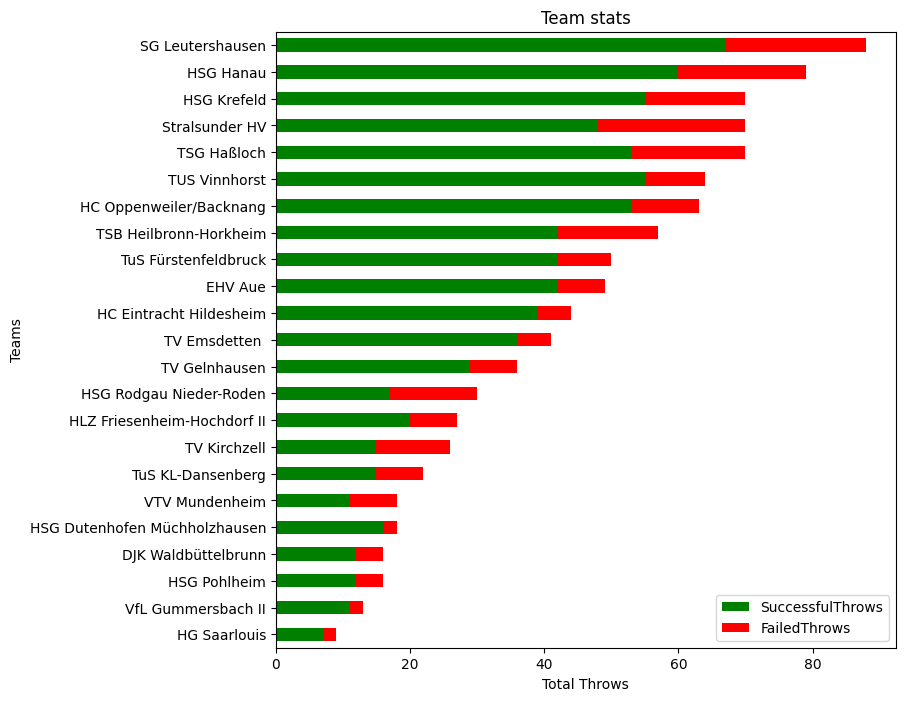

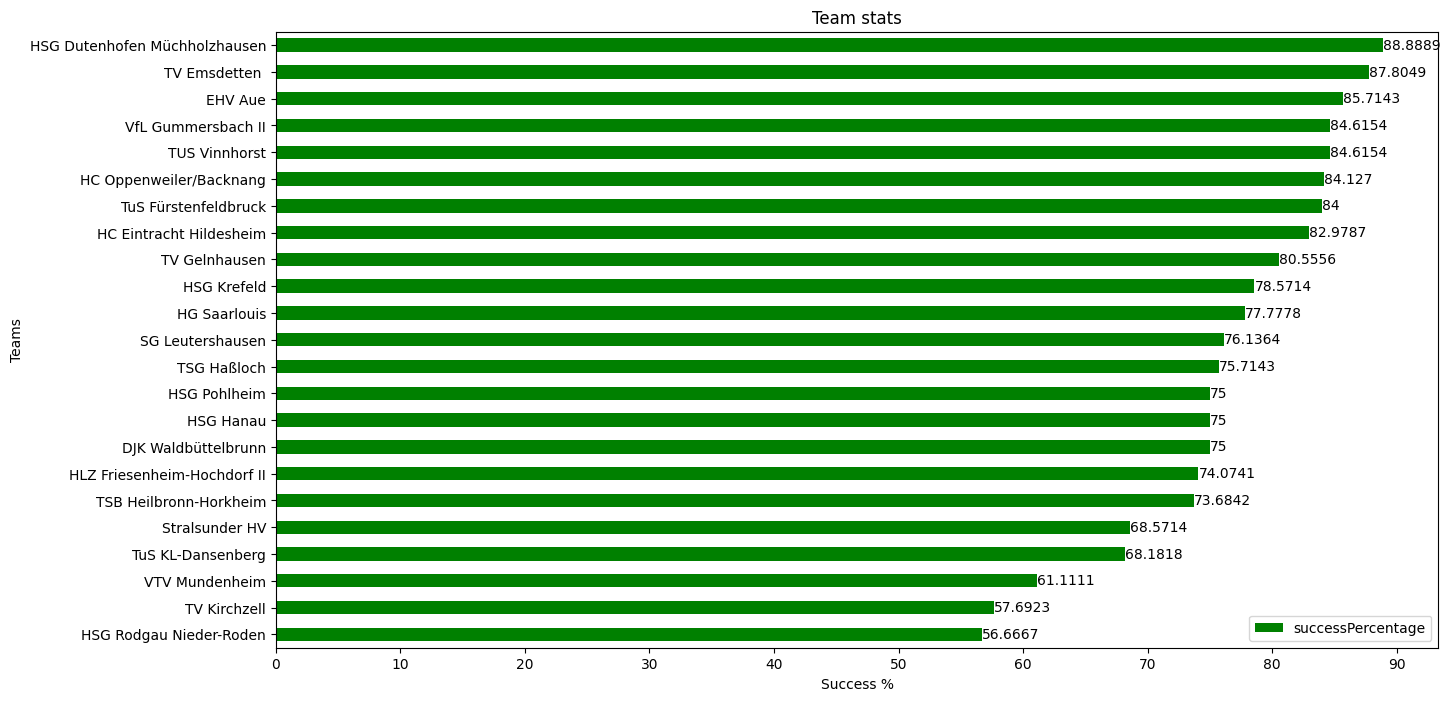

In [6]:
# Teamwise Throw stats
df2 = df.groupby(['team'])['team'].count().reset_index(name='TotatlThrows')
df3 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df3 = df3.groupby(['team'])['team'].count().reset_index(name="SuccessfulThrows")
df4 = df.loc[(df.throwSuccess == 0)]
df4 = df4.groupby(['team'])['team'].count().reset_index(name="FailedThrows")
df5 = pd.merge(df2,df3,on='team')
df5 = pd.merge(df5,df4,on='team')
df5['successPercentage'] = (df5['SuccessfulThrows']/df5['TotatlThrows'])*100
display(df5.sort_values('successPercentage',ascending=False))
df5.sort_values('TotatlThrows',ascending=True).set_index('team')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Team stats',color=("green", "red"),xlabel='Total Throws', ylabel='Teams',figsize=(8,8) )

ax = df5.sort_values('successPercentage',ascending=True).set_index('team')[['successPercentage']].plot.barh( title='Team stats',color=("green", "red"),xlabel='Success %', ylabel='Teams',figsize=(15,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])

Team & player wise Throw stats

In [7]:
# Team & player wise Throw stats
df6 = df.groupby(['team','name'])['name'].count().reset_index(name='TotatlThrows')
df7 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df7 = df7.groupby(['team','name'])['name'].count().reset_index(name="SuccessfulThrows")
df8 = df.loc[(df.throwSuccess == 0)]
df8 = df8.groupby(['team','name'])['name'].count().reset_index(name="FailedThrows")
df9 = df6.merge(df7,left_on=['team','name'],right_on=['team','name'],  how='left')
df9 = df9.merge(df8,left_on=['team','name'],right_on=['team','name'],  how='left')
df9.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df9['successPercentage'] = (df9['SuccessfulThrows']/df9['TotatlThrows'])*100
df9.sort_values('name',ascending=False)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(df9.sort_values('successPercentage',ascending=False))

,team,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
7,HC Eintracht Hildesheim,von Hermanni,42,35.0,4.0,83.333333
74,VTV Mundenheim,Treiber,5,2.0,3.0,40.000000
6,HC Eintracht Hildesheim,Tonar,3,3.0,0.0,100.000000
56,TV Emsdetten,Terhaer,6,5.0,1.0,83.333333
66,TuS Fürstenfeldbruck,Stumpf,1,1.0,0.0,100.000000
...,...,...,...,...,...,...
16,HSG Dutenhofen Müchholzhausen,Bremond,18,16.0,2.0,88.888889
1,EHV Aue,Blecha,1,1.0,0.0,100.000000
17,HSG Hanau,Bergold,75,58.0,16.0,77.333333
10,HG Saarlouis,Becker,6,6.0,0.0,100.000000


Player wise Throw stats

,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
44,Schliedermann,11,10,1,90.909091
26,Klasmann,11,10,1,90.909091
27,Kolodziej,49,44,4,89.795918
2,Bremond,18,16,2,88.888889
47,Schroven,9,8,1,88.888889
22,Holzner,34,30,4,88.235294
25,Kerst,40,35,5,87.500000
29,Lux,31,27,4,87.096774
39,Pauli,65,56,9,86.153846
14,Gansau,7,6,1,85.714286


[Text(0, 0, '25'),
 Text(0, 0, '33.3333'),
 Text(0, 0, '33.3333'),
 Text(0, 0, '40'),
 Text(0, 0, '45.4545'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '54.5455'),
 Text(0, 0, '56.25'),
 Text(0, 0, '57.1429'),
 Text(0, 0, '60'),
 Text(0, 0, '62.5'),
 Text(0, 0, '64.2857'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '67.8571'),
 Text(0, 0, '69.2308'),
 Text(0, 0, '71.7949'),
 Text(0, 0, '72.2222'),
 Text(0, 0, '75'),
 Text(0, 0, '75'),
 Text(0, 0, '75'),
 Text(0, 0, '75'),
 Text(0, 0, '75'),
 Text(0, 0, '77.2727'),
 Text(0, 0, '77.3333'),
 Text(0, 0, '77.7778'),
 Text(0, 0, '80'),
 Text(0, 0, '80'),
 Text(0, 0, '82.1429'),
 Text(0, 0, '82.6087'),
 Text(0, 0, '82.6923'),
 Text(0, 0, '83.3333'),
 Text(0, 0, '83.3333'),
 Text(0, 0, '83.3333'),
 Text(0, 0, '85.7143'),
 Text(0, 0, '85.7143'),
 Text(0, 0

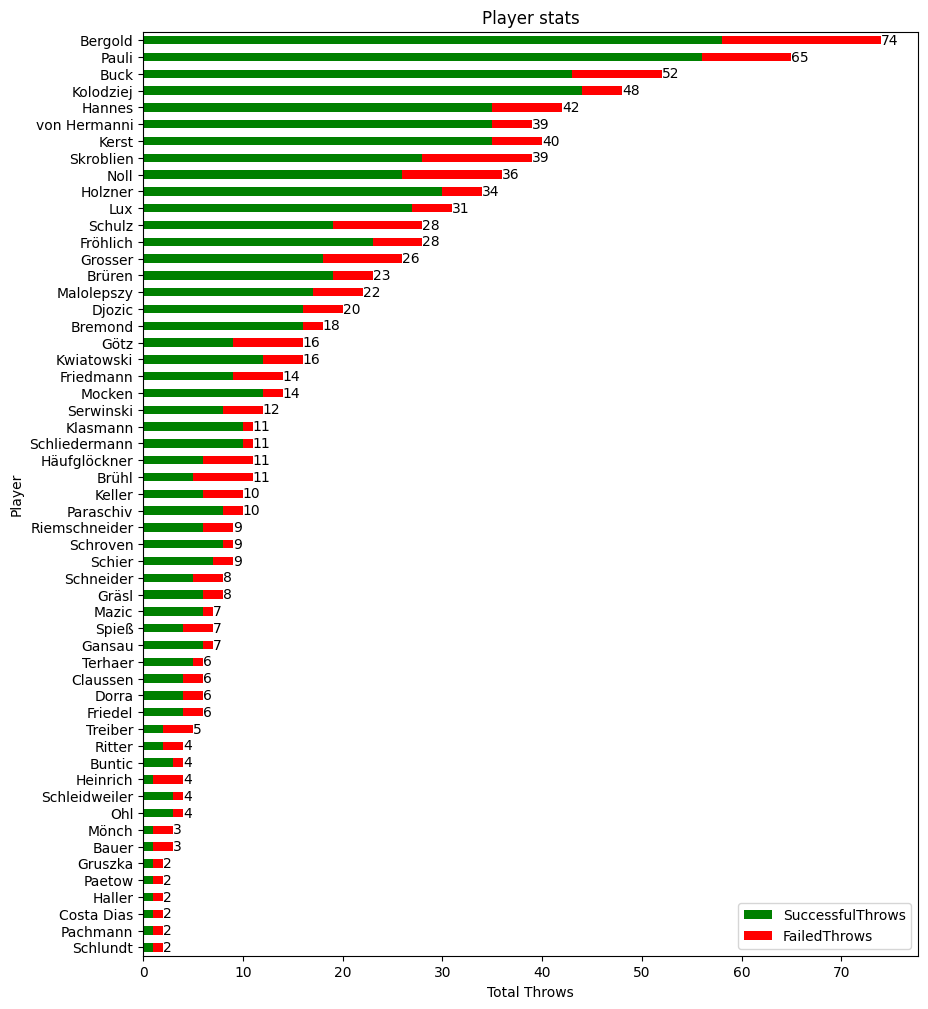

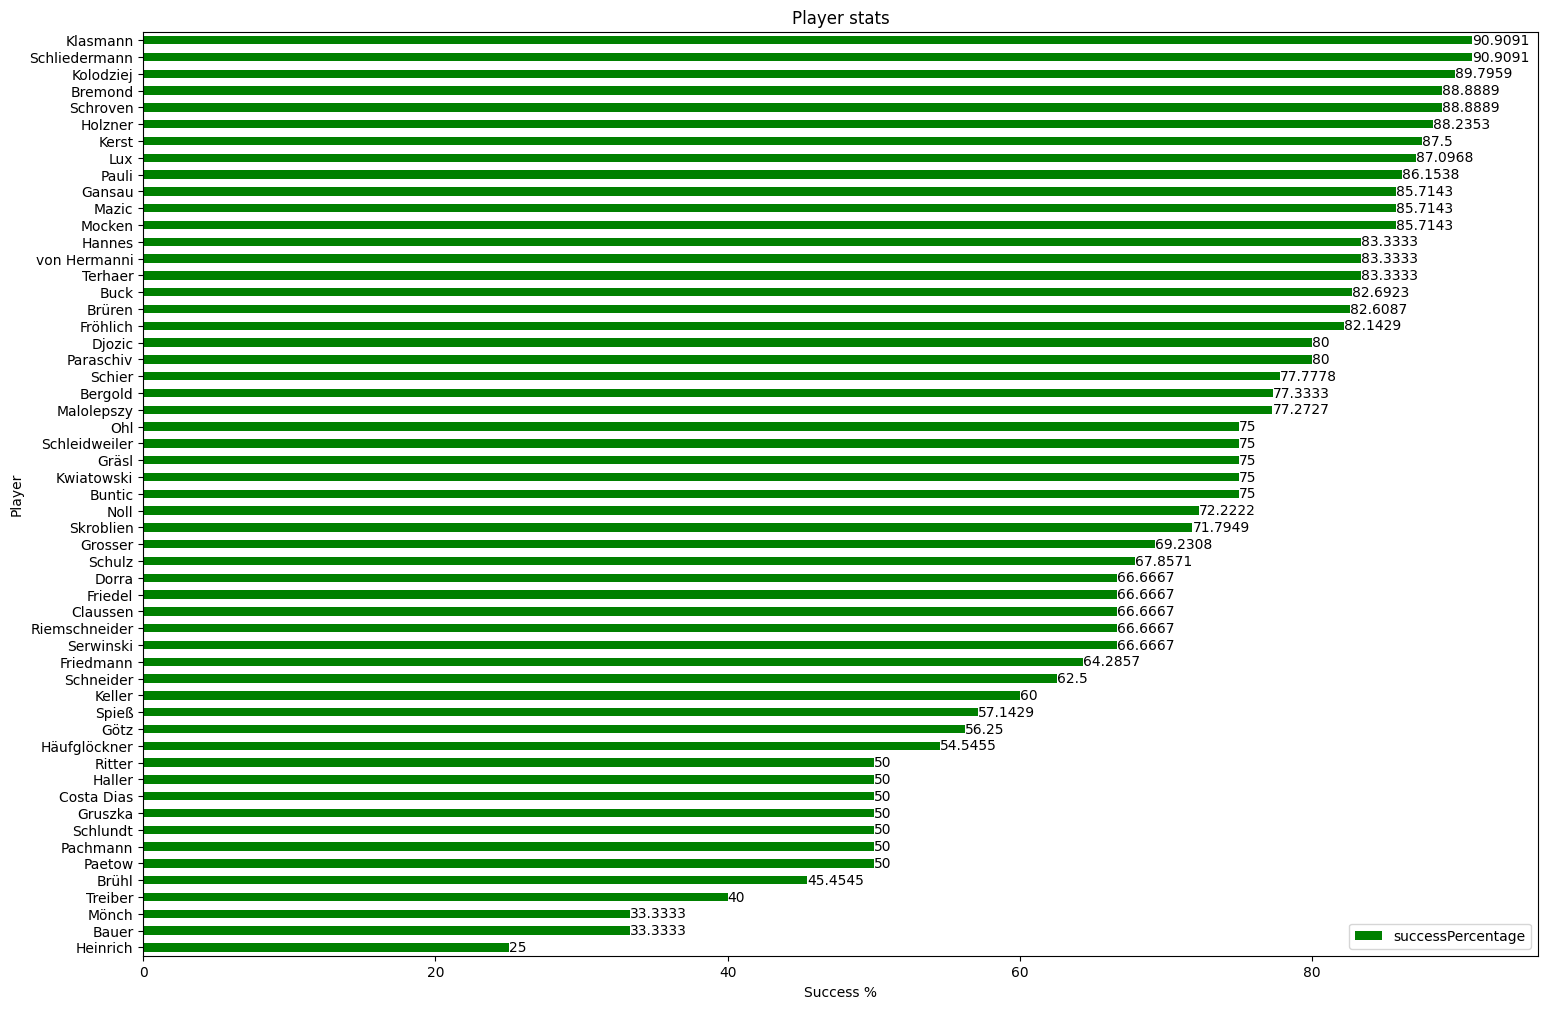

In [8]:
# Player wise Throw stats
df10 = df.groupby(['name'])['name'].count().reset_index(name='TotatlThrows')
df11 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df11 = df11.groupby(['name'])['name'].count().reset_index(name="SuccessfulThrows")
df12 = df.loc[(df.throwSuccess == 0)]
df12 = df12.groupby(['name'])['name'].count().reset_index(name="FailedThrows")
df13 = pd.merge(df10,df11,on=['name'])
df13 = pd.merge(df13,df12,on=['name'])
df13.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df13['successPercentage'] = (df13['SuccessfulThrows']/df13['TotatlThrows'])*100
df13.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df13.sort_values('successPercentage',ascending=False))
    
ax1 = df13.sort_values('TotatlThrows',ascending=True).set_index('name')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Player stats',color=("green", "red"),xlabel='Total Throws', ylabel='Player',figsize=(10,12) )
ax1.bar_label(ax1.containers[1])
ax2 = df13.sort_values('successPercentage',ascending=True).set_index('name')[['successPercentage']].plot.barh( title='Player stats',color=("green", "red"),xlabel='Success %', ylabel='Player',figsize=(18,12) )
ax2.bar_label(ax2.containers[0])

Region Wise Stats

,region,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
0,east,97,81,12,83.505155
4,west,114,91,20,79.824561
2,south,246,195,48,79.268293
1,north,139,103,31,74.100719
3,south-west,423,305,108,72.104019


[Text(0, 0, '72.104'),
 Text(0, 0, '74.1007'),
 Text(0, 0, '79.2683'),
 Text(0, 0, '79.8246'),
 Text(0, 0, '83.5052')]

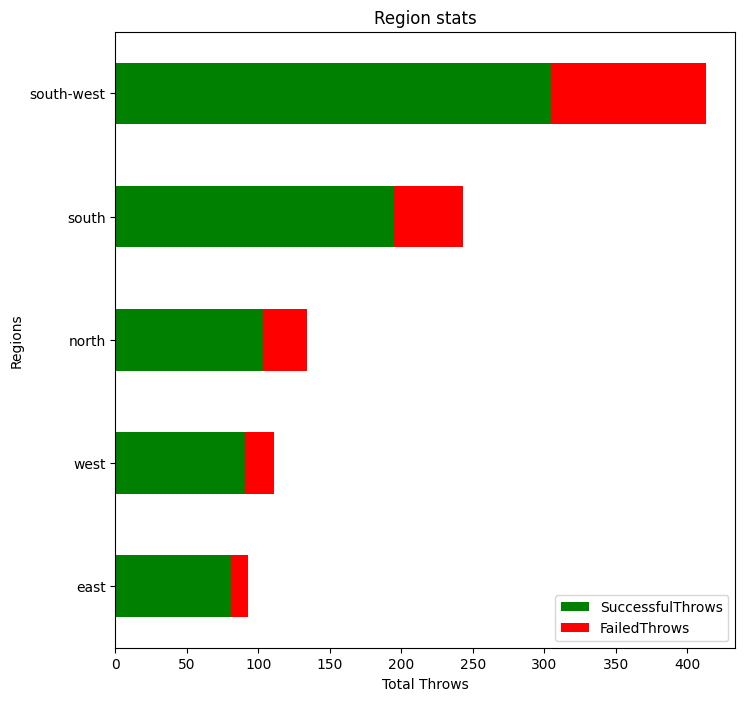

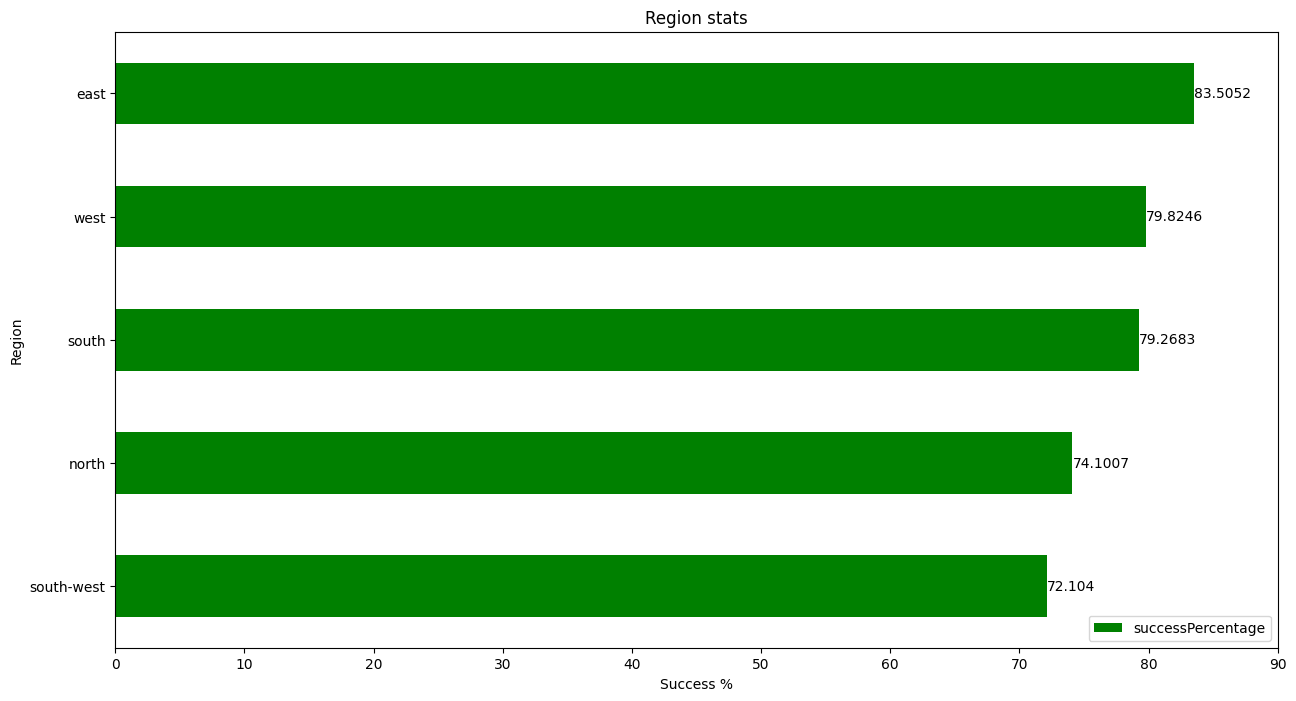

In [9]:
# Teamwise Throw stats
df112 = df.groupby(['region'])['region'].count().reset_index(name='TotatlThrows')
df113 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df113 = df113.groupby(['region'])['region'].count().reset_index(name="SuccessfulThrows")
df114 = df.loc[(df.throwSuccess == 0)]
df114 = df114.groupby(['region'])['region'].count().reset_index(name="FailedThrows")
df115 = pd.merge(df112,df113,on='region')
df115 = pd.merge(df115,df114,on='region')
df115['successPercentage'] = (df115['SuccessfulThrows']/df115['TotatlThrows'])*100
display(df115.sort_values('successPercentage',ascending=False))
df115.sort_values('TotatlThrows',ascending=True).set_index('region')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Region stats',color=("green", "red"),xlabel='Total Throws', ylabel='Regions',figsize=(8,8) )

ax = df115.sort_values('successPercentage',ascending=True).set_index('region')[['successPercentage']].plot.barh( title='Region stats',color=("green", "red"),xlabel='Success %', ylabel='Region',figsize=(15,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])

Throw Success based on lastTrow Success

679
bothSuccess: 465
bothFailed: 21
failedButLastSuccess: 119
successButLastFailed: 74
------------------------------
bothNachwurf: 0
successLastNachwurf: 11
failedLastNachwurf: 1


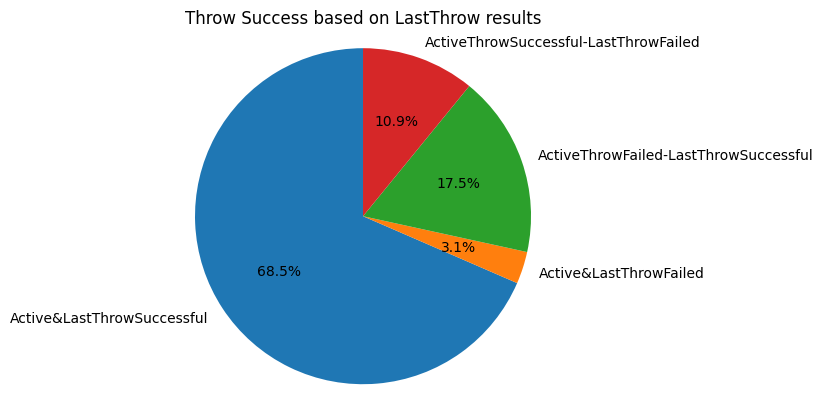

In [10]:
df14 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df14.dropna(inplace=True)
df14.replace(to_replace=2.0, value=1.0, inplace=True)
print(df14.count()[0])
bothSuccess = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 1)].count()[0]
print('bothSuccess: '+ str(bothSuccess))
bothFailed = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 0)].count()[0]
print('bothFailed: '+ str(bothFailed))
failedButLastSuccess = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 1)].count()[0]
print('failedButLastSuccess: '+ str(failedButLastSuccess))    
successButLastFailed = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 0)].count()[0] 
print('successButLastFailed: '+ str(successButLastFailed)) 

print('------------------------------')
df15 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df15.dropna(inplace=True)
bothNachwurf = df15[(df15.throwSuccess == 2) & (df15.lastThrowSuccess == 2)].count()[0]
print('bothNachwurf: '+ str(bothNachwurf))
successLastNachwurf = df15[(df15.throwSuccess == 1) & (df15.lastThrowSuccess == 2)].count()[0]
print('successLastNachwurf: '+ str(successLastNachwurf))
failedLastNachwurf = df15[(df15.throwSuccess == 0) & (df15.lastThrowSuccess == 2)].count()[0]
print('failedLastNachwurf: '+ str(failedLastNachwurf))

labels = ['Active&LastThrowSuccessful','Active&LastThrowFailed','ActiveThrowFailed-LastThrowSuccessful','ActiveThrowSuccessful-LastThrowFailed']
values = [bothSuccess,bothFailed,failedButLastSuccess,successButLastFailed]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Throw Success based on LastThrow results')
plt.show()

Throw analysis fo L-R players

noOfThrowsFromR: 809
noOfThrowsFromL: 184
------------------
successR: 630
successL: 145
failedR: 179
failedL: 39
----------------------
%successR: 77.87391841779974
%successL: 78.80434782608695


[Text(0, 0, '77.8739'), Text(0, 0, '78.8043')]

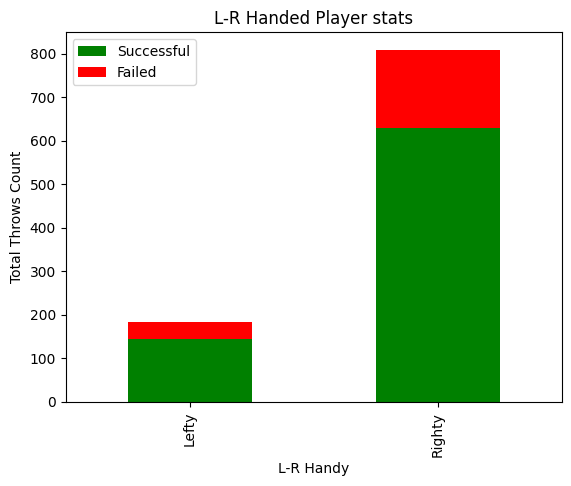

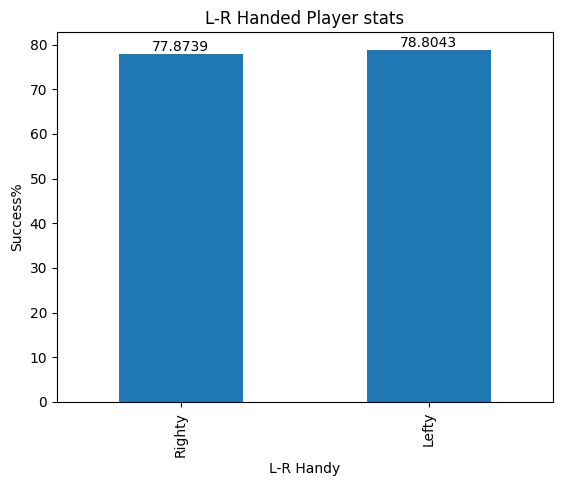

In [11]:
df15 = df.loc[:,('throwSuccess','LRHandy')]
df15.dropna(inplace=True)
df15['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
noOfThrowsFromR = df15[ (df15.LRHandy == 1)].count()[0]
print('noOfThrowsFromR: '+ str(noOfThrowsFromR))
noOfThrowsFromL = df15[ (df15.LRHandy == 2)].count()[0]
print('noOfThrowsFromL: '+ str(noOfThrowsFromL)),

print('------------------')

successR = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 1)].count()[0]
print('successR: '+ str(successR))

successL = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 2)].count()[0]
print('successL: '+ str(successL))

failedR = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 1)].count()[0]
print('failedR: '+ str(failedR))

failedL = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 2)].count()[0]
print('failedL: '+ str(failedL))


print('----------------------')
print('%successR: '+ str((successR/noOfThrowsFromR)*100))
print('%successL: '+ str((successL/noOfThrowsFromL)*100))

lrdf = pd.DataFrame({'L-R Handy':['Righty','Lefty'],'TotalThrows':[noOfThrowsFromR,noOfThrowsFromL],
                     'Successful':[successR,successL],
                     'Failed':[failedR,failedL],
                     'Success%':[(successR/noOfThrowsFromR)*100,(successL/noOfThrowsFromL)*100]})

lrdf.sort_values('TotalThrows',ascending=True).set_index('L-R Handy')[['Successful','Failed']].plot.bar(stacked=True, title='L-R Handed Player stats',color=("green", "red"), ylabel='Total Throws Count')

ax = lrdf.sort_values('Success%',ascending=True).set_index('L-R Handy')[['Success%']].plot.bar( title='L-R Handed Player stats',ylabel='Success%' ,legend=False)
ax.bar_label(ax.containers[0])

Throw Analysis based on pressure situation

                                    pressureSituation  throwSuccess  Count
0                               No Pressure Situation           0.0    155
1                               No Pressure Situation           1.0    519
2                                    GoalKeeperChange           0.0     19
3                                    GoalKeeperChange           1.0     95
4                                     LastThrowFailed           0.0     16
5                                     LastThrowFailed           1.0     55
6                  GoalDiffLessEqualTo4After50MinPlay           0.0     17
7                  GoalDiffLessEqualTo4After50MinPlay           1.0     69
8                    GoalKeeperChange-LastThrowFailed           0.0      4
9                    GoalKeeperChange-LastThrowFailed           1.0      8
10  GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...           0.0      4
11  GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...           1.0     11
12  LastThrowFailed-GoalD

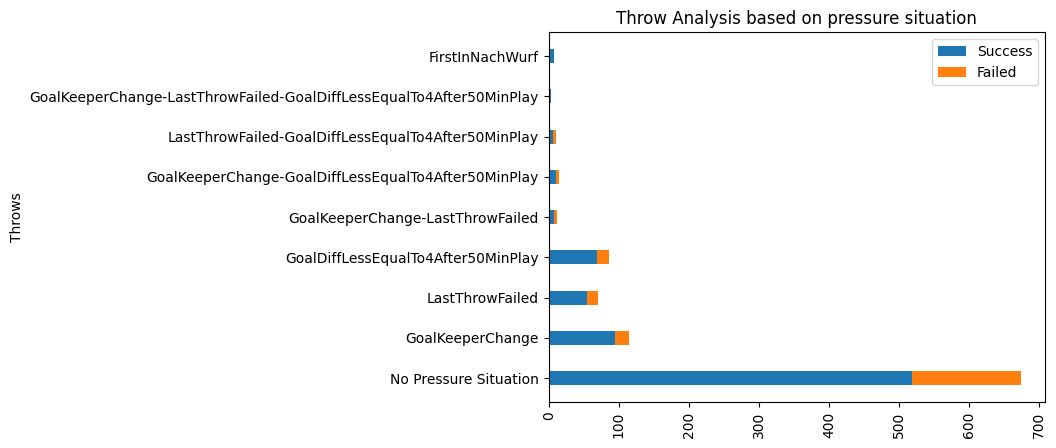

,pressureSituation,throwSuccess,Count
0,No Pressure Situation,0.0,155
1,No Pressure Situation,1.0,519
2,GoalKeeperChange,0.0,19
3,GoalKeeperChange,1.0,95
4,LastThrowFailed,0.0,16
5,LastThrowFailed,1.0,55
6,GoalDiffLessEqualTo4After50MinPlay,0.0,17
7,GoalDiffLessEqualTo4After50MinPlay,1.0,69
8,GoalKeeperChange-LastThrowFailed,0.0,4
9,GoalKeeperChange-LastThrowFailed,1.0,8


In [12]:
df16 = df.loc[:,('pressureSituation','throwSuccess')]
df16['throwSuccess'].replace(2,1, inplace=True)
df16.dropna(inplace=True)
df16 = df16.groupby(['pressureSituation','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')


X = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
     'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
     'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'FirstInNachWurf']

for val in df16['pressureSituation']:
     df16['pressureSituation'].replace(val,X[int(val)], inplace=True)


print(df16)
grp = df16['pressureSituation'].unique()
s = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 1.0)]
     if tempdf.empty:
          s.append(0.0)
     else:
          s.append(tempdf.iloc[0,2])
f = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 0.0)]
     if tempdf.empty:
          f.append(0)
     else:
          f.append(tempdf.iloc[0,2])
t = list()
for g in grp:
     t.append(df16[(df16.pressureSituation == g)]['Count'].sum())


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(grp, s, width,  label='Success')
ax.barh(grp, f, width,  left=s,
       label='Failed')

ax.set_ylabel('Throws')
#ax.set_xscale('log')
ax.set_title('Throw Analysis based on pressure situation')
ax.legend()
plt.xticks(rotation=90)
plt.show()
df16

,PressureSituation,successPercentage
0,No Pressure Situation,77.002967
1,GoalKeeperChange,83.333333
2,LastThrowFailed,77.464789
3,GoalDiffLessEqualTo4After50MinPlay,80.232558
4,GoalKeeperChange-LastThrowFailed,66.666667
5,GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...,73.333333
6,LastThrowFailed-GoalDiffLessEqualTo4After50Min...,60.000000
7,GoalKeeperChange-LastThrowFailed-GoalDiffLessE...,100.000000
8,FirstInNachWurf,100.000000


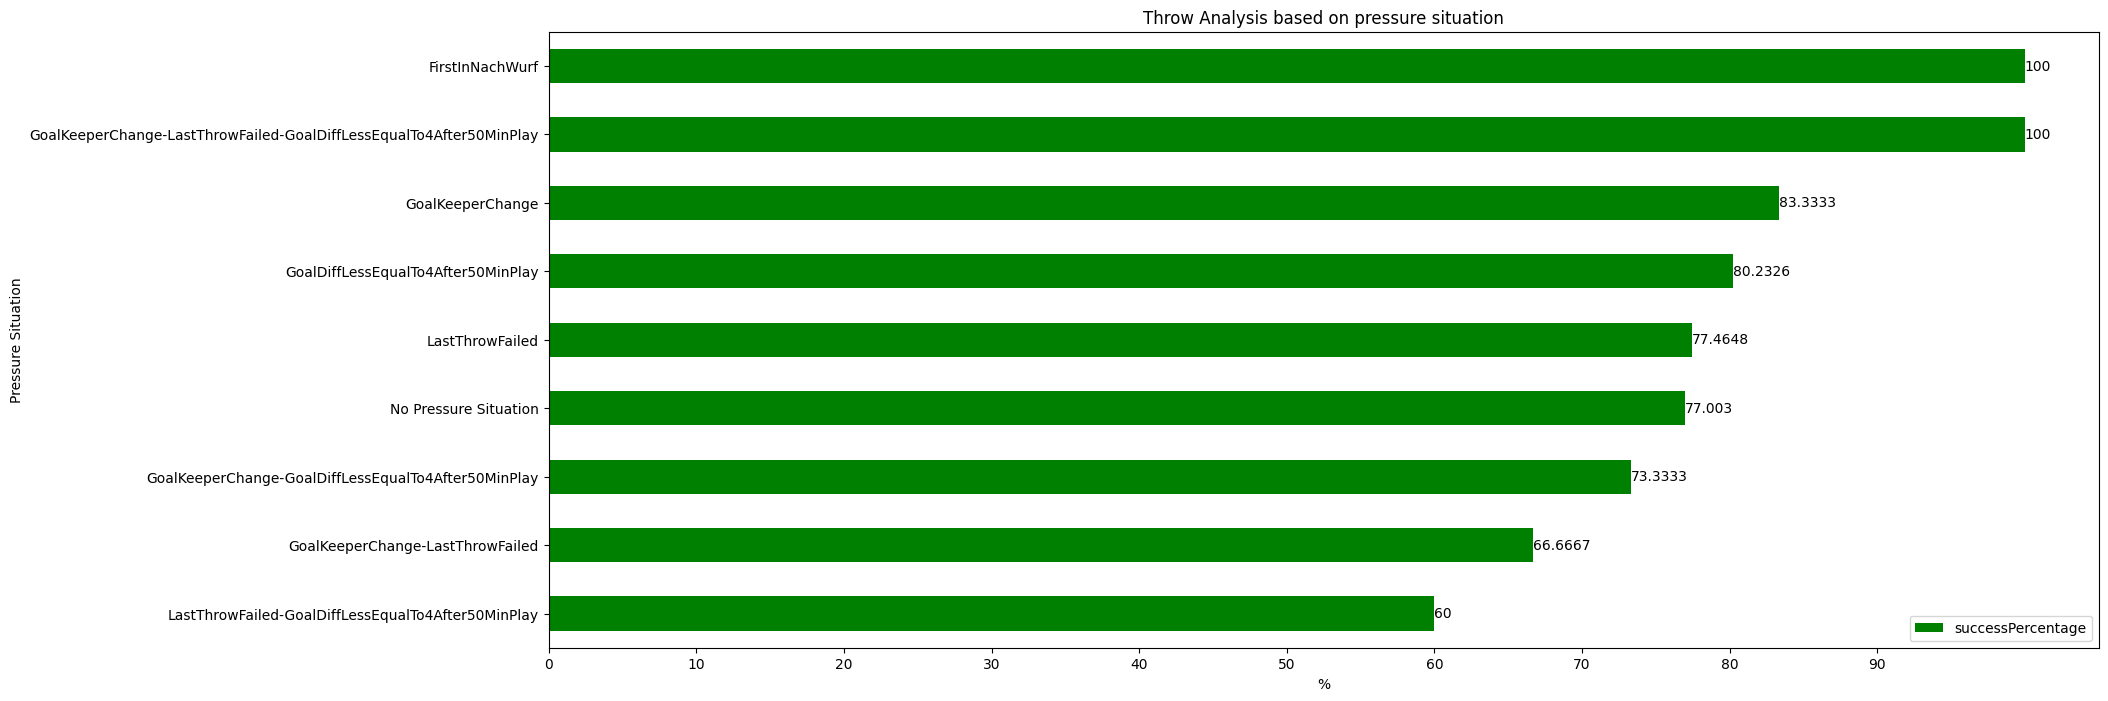

In [13]:

pressureSituation = pd.DataFrame({'PressureSituation':grp,'successPercentage':[(se/te)*100 for se, te in zip(s, t)]})
ax = pressureSituation.sort_values('successPercentage',ascending=True).set_index('PressureSituation')[['successPercentage']].plot.barh( title='Throw Analysis based on pressure situation',color=("green", "red"),xlabel='%', ylabel='Pressure Situation',figsize=(20,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])
pressureSituation

Throw Direction

,throwDirection,throwSuccess,Count
0,1.0,0.0,25
1,1.0,1.0,70
2,2.0,0.0,12
3,2.0,1.0,22
4,3.0,0.0,35
5,3.0,1.0,115
6,4.0,0.0,9
7,4.0,1.0,23
9,5.0,1.0,5
8,5.0,0.0,3


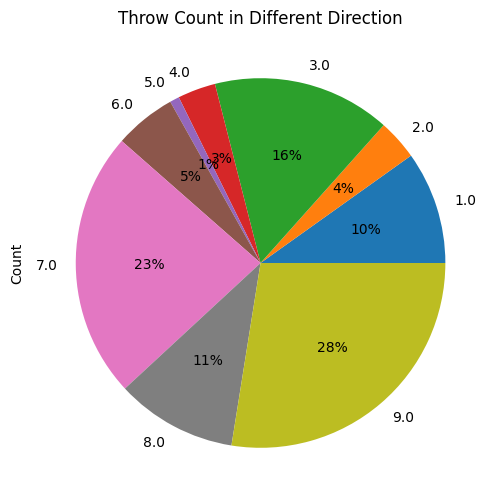

In [14]:
df17 = df.loc[:,('throwDirection','throwSuccess')]
df17.dropna(inplace=True)
df17['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
df18 = df17.copy()
df18 = df18.groupby(['throwDirection'])['throwSuccess'].count().reset_index(name='Count')
df18.set_index('throwDirection').plot.pie(y='Count', figsize=(6, 6), title='Throw Count in Different Direction',autopct='%.0f%%',legend=None)
df17 = df17.groupby(['throwDirection','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df17.sort_values(['throwDirection'],ascending=True,inplace=True)
df17

Text(0.5, 1.0, '9')

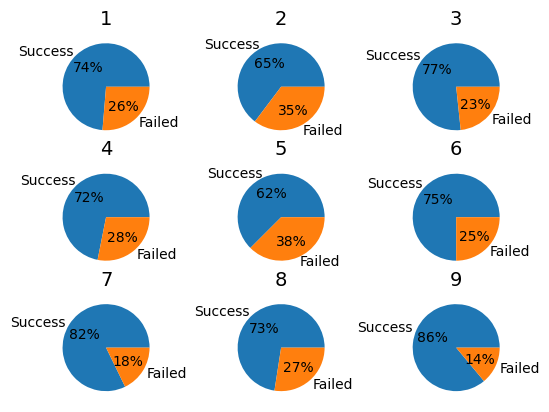

In [15]:
# Some data
labels = 'Success', 'Failed'

# Make figure and axes
fig, axs = plt.subplots(3, 3)

axs[0, 0].pie([70,25], labels=labels, autopct='%.0f%%' )
axs[0, 0].set_title('1', fontsize=14)
axs[0, 1].pie([22,12], labels=labels, autopct='%.0f%%')
axs[0, 1].set_title('2', fontsize=14)
axs[0, 2].pie([115,35], labels=labels,  autopct='%.0f%%')
axs[0, 2].set_title('3', fontsize=14)

axs[1, 0].pie([23,9], labels=labels, autopct='%.0f%%')
axs[1, 0].set_title('4', fontsize=14)
axs[1, 1].pie([5,3], labels=labels,  autopct='%.0f%%')
axs[1, 1].set_title('5', fontsize=14)
axs[1, 2].pie([39,13], labels=labels, autopct='%.0f%%')
axs[1, 2].set_title('6', fontsize=14)

axs[2, 0].pie([185,40], labels=labels,  autopct='%.0f%%')
axs[2, 0].set_title('7', fontsize=14)
axs[2, 1].pie([74,28], labels=labels, autopct='%.0f%%')
axs[2, 1].set_title('8', fontsize=14)
axs[2, 2].pie([228,37], labels=labels,  autopct='%.0f%%')
axs[2, 2].set_title('9', fontsize=14)


Text(0.5, 1.0, '9')

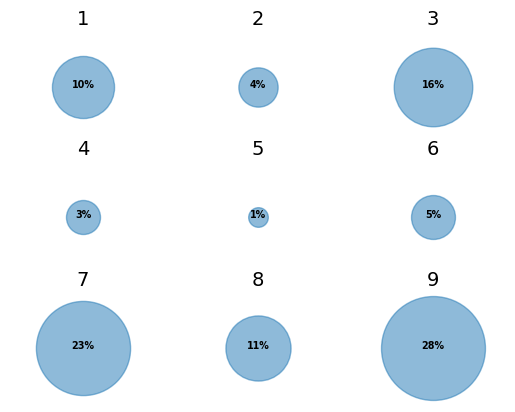

In [16]:

# Make figure and axes
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter([0.5], [0.5],
                 alpha=0.5,
                 s = 10*200)
axs[0, 0].text(0.5, 0.5, '10%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[0, 0].axis('off')
axs[0, 0].set_title('1', fontsize=14)
axs[0, 1].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 4*200)
axs[0, 1].text(0.5, 0.5, '4%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[0, 1].axis('off')
axs[0, 1].set_title('2', fontsize=14)
axs[0, 2].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 16*200)
axs[0, 2].text(0.5, 0.5, '16%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[0, 2].axis('off')
axs[0, 2].set_title('3', fontsize=14)



axs[1, 0].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 3*200)
axs[1, 0].text(0.5, 0.5, '3%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[1, 0].axis('off')
axs[1, 0].set_title('4', fontsize=14)
axs[1, 1].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 1*200)
axs[1, 1].text(0.5, 0.5, '1%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[1, 1].axis('off')
axs[1, 1].set_title('5', fontsize=14)
axs[1, 2].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 5*200)
axs[1, 2].text(0.5, 0.5, '5%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[1, 2].axis('off')
axs[1, 2].set_title('6', fontsize=14)





axs[2, 0].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 23*200)
axs[2, 0].text(0.5, 0.5, '23%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[2, 0].axis('off')
axs[2, 0].set_title('7', fontsize=14)
axs[2, 1].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 11*200)
axs[2, 1].text(0.5, 0.5, '11%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[2, 1].axis('off')
axs[2, 1].set_title('8', fontsize=14)
axs[2, 2].scatter([0.5], [0.5], 
                 alpha=0.5,
                 s = 28*200)
axs[2, 2].text(0.5, 0.5, '28%', horizontalalignment='center', size='x-small', color='black', weight='semibold')
axs[2, 2].axis('off')
axs[2, 2].set_title('9', fontsize=14)